In [1]:
import gym
import numpy as np

our_win=[]
our_loss=[]
our_cumaltive=[]
our_percentage=[]
ace_matrix = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 2, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 10)

non_ace_matrix = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 2, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).reshape(18, 10)

env = gym.make('Blackjack-v1')

ACTION_STICK = 0
ACTION_HIT = 1
ACTION_DOUBLE_DOWN = 2

def get_action(player_sum, dealer_card, has_usable_ace):
    if has_usable_ace:
        return ace_matrix[player_sum - 12][dealer_card - 1]
    else:
        return non_ace_matrix[player_sum - 4][dealer_card - 1]

def handle_double_down(env, state):
    next_state, reward, done, _, _ = env.step(ACTION_HIT)  # Take one hit
    if not done:
        next_state, reward, done, _, _ = env.step(ACTION_STICK)  # Then stand
    reward *= 2  # Double the reward
    return next_state, reward, done

for i in range(11):
    num_rounds = 100000
    wins = 0
    losses = 0
    draws=0
    cumulative_winnings = 0
    
    for _ in range(num_rounds):
        state, _ = env.reset()
        done = False
        reward = 0
        
        while not done:
            player_sum, dealer_card, has_usable_ace = state
            action = get_action(player_sum, dealer_card, has_usable_ace)
            
            if action == ACTION_DOUBLE_DOWN:
                next_state, reward, done = handle_double_down(env, state)
            else:
                next_state, reward, done, _, _ = env.step(action)
            
            state = next_state
        
        if reward > 0:
            wins += 1
        elif reward < -0.1:
            losses += 1
        else:
            draws +=1
        
        cumulative_winnings += reward
    
    print("Number of wins:", wins)
    print("Number of losses:", losses)
    print("Cumulative winnings:", cumulative_winnings)
    percentagess=wins/(wins+losses+draws)*100
    print(percentagess,"%")
    
    our_win.append(wins)
    our_loss.append(losses)
    our_cumaltive.append(cumulative_winnings)
    our_percentage.append(percentagess)

/home/dipit/anaconda3/envs/ds/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Number of wins: 42738
Number of losses: 48438
Cumulative winnings: -5886.0
42.738 %
Number of wins: 42208
Number of losses: 48732
Cumulative winnings: -6747.0
42.208 %
Number of wins: 42142
Number of losses: 48828
Cumulative winnings: -6937.0
42.142 %
Number of wins: 42267
Number of losses: 48666
Cumulative winnings: -6590.0
42.266999999999996 %
Number of wins: 42237
Number of losses: 48725
Cumulative winnings: -6655.0
42.237 %
Number of wins: 42162
Number of losses: 48795
Cumulative winnings: -6921.0
42.162 %
Number of wins: 42179
Number of losses: 48631
Cumulative winnings: -6600.0
42.179 %
Number of wins: 42172
Number of losses: 48788
Cumulative winnings: -6928.0
42.172 %
Number of wins: 42285
Number of losses: 48797
Cumulative winnings: -6741.0
42.285000000000004 %
Number of wins: 42224
Number of losses: 48753
Cumulative winnings: -6789.0
42.224000000000004 %
Number of wins: 42435
Number of losses: 48311
Cumulative winnings: -6121.0
42.435 %


BASIC STARTEGY

In [2]:
import gym
import numpy as np

basic_win=[]
basic_loss=[]
basic_cumaltive=[]
basic_percentage=[]
ace_matrix = np.array([
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).reshape(10, 10)

non_ace_matrix = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 1, 2],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).reshape(18, 10)

env = gym.make('Blackjack-v1')

ACTION_STICK = 0
ACTION_HIT = 1
ACTION_DOUBLE_DOWN = 2

def get_action(player_sum, dealer_card, has_usable_ace):
    if has_usable_ace:
        return ace_matrix[player_sum - 12][dealer_card - 1]
    else:
        return non_ace_matrix[player_sum - 4][dealer_card - 1]

def handle_double_down(env, state):
    next_state, reward, done, _, _ = env.step(ACTION_HIT)  # Take one hit
    if not done:
        next_state, reward, done, _, _ = env.step(ACTION_STICK)  # Then stand
    reward *= 2  # Double the reward
    return next_state, reward, done


for i in range(11):
    num_rounds = 100000
    wins = 0
    draws=0
    losses = 0
    cumulative_winnings = 0
    for _ in range(num_rounds):
        state, _ = env.reset()
        done = False
        reward = 0
        
        while not done:
            player_sum, dealer_card, has_usable_ace = state
            action = get_action(player_sum, dealer_card, has_usable_ace)
            
            if action == ACTION_DOUBLE_DOWN:
                next_state, reward, done = handle_double_down(env, state)
            else:
                next_state, reward, done, _, _ = env.step(action)
            
            state = next_state
        
        if reward > 0:
            wins += 1
        elif reward < -0.1:
            losses += 1
        else:
            draws+=1
        
        
        cumulative_winnings += reward
    
    print("Number of wins:", wins)
    print("Number of losses:", losses)
    print("Cumulative winnings:", cumulative_winnings)
    percentagess=wins/(wins+losses+draws)*100
    print(percentagess,"%")
    
    basic_win.append(wins)
    basic_loss.append(losses)
    basic_cumaltive.append(cumulative_winnings)
    basic_percentage.append(percentagess)

Number of wins: 42230
Number of losses: 49775
Cumulative winnings: -6236.0
42.230000000000004 %
Number of wins: 41961
Number of losses: 49915
Cumulative winnings: -6620.0
41.961 %
Number of wins: 42161
Number of losses: 49834
Cumulative winnings: -6307.0
42.161 %
Number of wins: 42366
Number of losses: 49609
Cumulative winnings: -5774.0
42.366 %
Number of wins: 42121
Number of losses: 49804
Cumulative winnings: -6315.0
42.120999999999995 %
Number of wins: 42377
Number of losses: 49541
Cumulative winnings: -5867.0
42.376999999999995 %
Number of wins: 42192
Number of losses: 49743
Cumulative winnings: -6125.0
42.192 %
Number of wins: 42364
Number of losses: 49503
Cumulative winnings: -5608.0
42.364000000000004 %
Number of wins: 42205
Number of losses: 49560
Cumulative winnings: -6058.0
42.205 %
Number of wins: 41989
Number of losses: 49957
Cumulative winnings: -6625.0
41.989 %
Number of wins: 42361
Number of losses: 49622
Cumulative winnings: -5861.0
42.361 %


In [3]:
import gym
import numpy as np
import random

random_win=[]
random_loss=[]
random_cumaltive=[]
random_percentage=[]

env = gym.make('Blackjack-v1')

ACTION_STICK = 0
ACTION_HIT = 1
ACTION_DOUBLE_DOWN = 2

def get_action(player_sum, dealer_card, has_usable_ace):
    random_int = random.randint(0, 2)
    return random_int

def handle_double_down(env, state):
    next_state, reward, done, _, _ = env.step(ACTION_HIT)  # Take one hit
    if not done:
        next_state, reward, done, _, _ = env.step(ACTION_STICK)  # Then stand
    reward *= 2  # Double the reward
    return next_state, reward, done


for i in range(11):
    num_rounds = 100000
    wins = 0
    draws=0
    losses = 0
    cumulative_winnings = 0
    for _ in range(num_rounds):
        state, _ = env.reset()
        done = False
        reward = 0
        
        while not done:
            player_sum, dealer_card, has_usable_ace = state
            action = get_action(player_sum, dealer_card, has_usable_ace)
            
            if action == ACTION_DOUBLE_DOWN:
                next_state, reward, done = handle_double_down(env, state)
            else:
                next_state, reward, done, _, _ = env.step(action)
            
            state = next_state
        
        if reward > 0:
            wins += 1
        elif reward < -0.1:
            losses += 1
        else:
            draws+=1
        
        
        cumulative_winnings += reward
    
    print("Number of wins:", wins)
    print("Number of losses:", losses)
    print("Cumulative winnings:", cumulative_winnings)
    percentagess=wins/(wins+losses+draws)*100
    print(percentagess,"%")
    
    random_win.append(wins)
    random_loss.append(losses)
    random_cumaltive.append(cumulative_winnings)
    random_percentage.append(percentagess)

Number of wins: 27565
Number of losses: 67859
Cumulative winnings: -57230.0
27.565 %
Number of wins: 27649
Number of losses: 67984
Cumulative winnings: -56842.0
27.649 %
Number of wins: 27488
Number of losses: 68086
Cumulative winnings: -57309.0
27.488 %
Number of wins: 27594
Number of losses: 68067
Cumulative winnings: -57513.0
27.594 %
Number of wins: 27668
Number of losses: 68064
Cumulative winnings: -57376.0
27.668 %
Number of wins: 27754
Number of losses: 67767
Cumulative winnings: -56656.0
27.754 %
Number of wins: 27758
Number of losses: 67982
Cumulative winnings: -57107.0
27.758 %
Number of wins: 27422
Number of losses: 68183
Cumulative winnings: -57927.0
27.422 %
Number of wins: 27694
Number of losses: 67939
Cumulative winnings: -57138.0
27.694000000000003 %
Number of wins: 27503
Number of losses: 68135
Cumulative winnings: -57380.0
27.503 %
Number of wins: 27854
Number of losses: 67827
Cumulative winnings: -56742.0
27.854 %


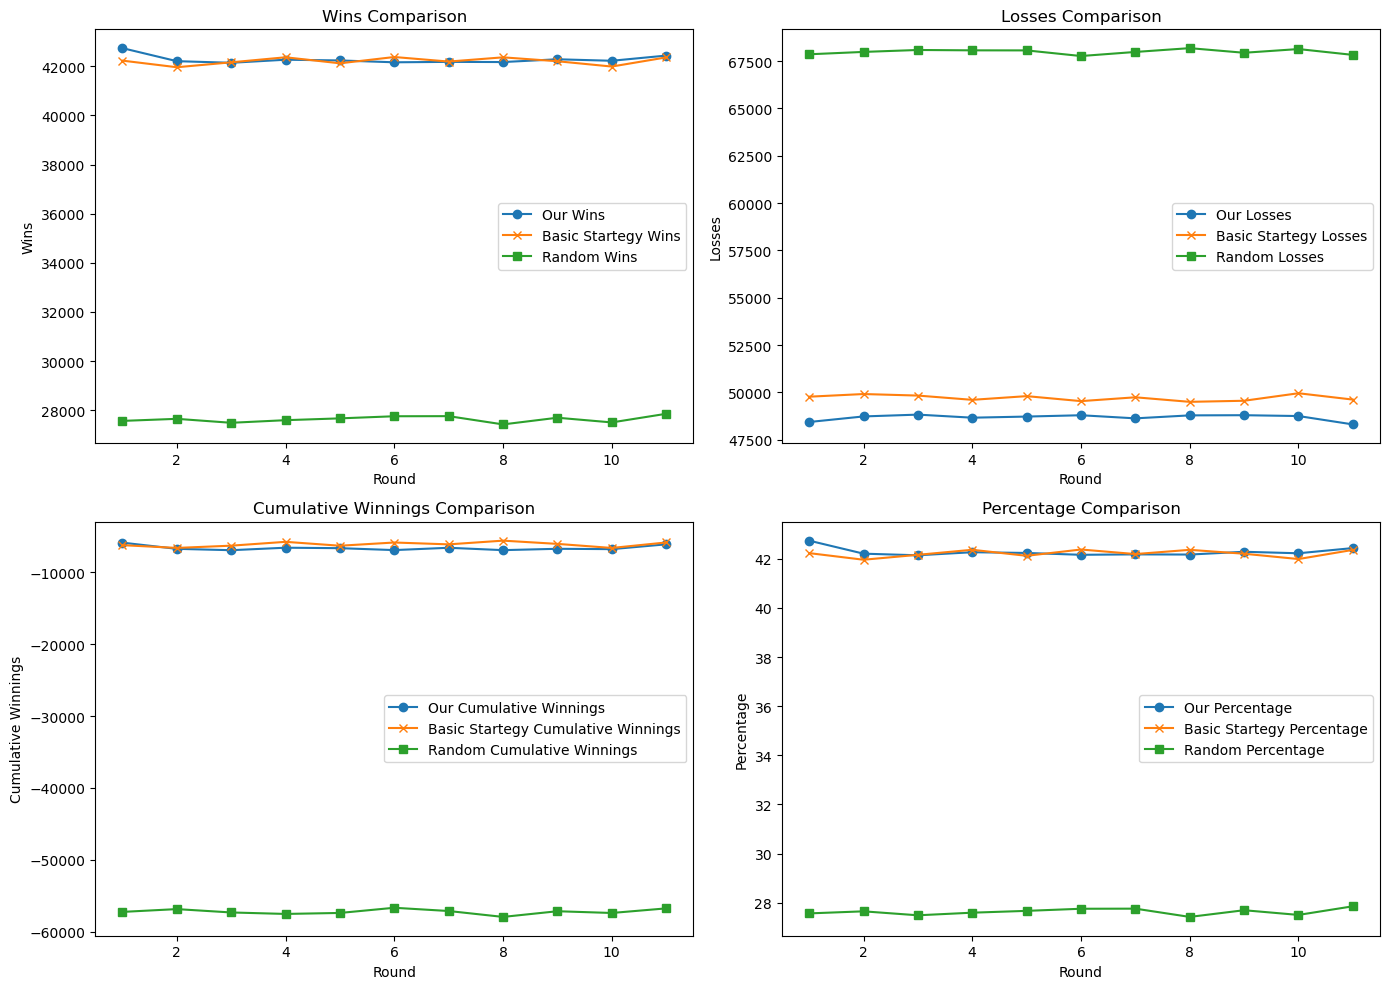

In [9]:
import matplotlib.pyplot as plt

indices = list(range(1, len(our_win) + 1))
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(indices, our_win, label='Our Wins', marker='o')
axs[0, 0].plot(indices[:len(basic_win)], basic_win, label='Basic Startegy Wins', marker='x')
axs[0, 0].plot(indices[:len(random_win)], random_win, label='Random Wins', marker='s')
axs[0, 0].set_title('Wins Comparison')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Wins')
axs[0, 0].legend()

axs[0, 1].plot(indices, our_loss, label='Our Losses', marker='o')
axs[0, 1].plot(indices[:len(basic_loss)], basic_loss, label='Basic Startegy Losses', marker='x')
axs[0, 1].plot(indices[:len(random_loss)], random_loss, label='Random Losses', marker='s')
axs[0, 1].set_title('Losses Comparison')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Losses')
axs[0, 1].legend()

axs[1, 0].plot(indices[:len(our_cumaltive)], our_cumaltive, label='Our Cumulative Winnings', marker='o')
axs[1, 0].plot(indices[:len(basic_cumaltive)], basic_cumaltive, label='Basic Startegy Cumulative Winnings', marker='x')
axs[1, 0].plot(indices[:len(random_cumaltive)], random_cumaltive, label='Random Cumulative Winnings', marker='s')
axs[1, 0].set_title('Cumulative Winnings Comparison')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Cumulative Winnings')
axs[1, 0].legend()

axs[1, 1].plot(indices, our_percentage, label='Our Percentage', marker='o')
axs[1, 1].plot(indices[:len(basic_percentage)], basic_percentage, label='Basic Startegy Percentage', marker='x')
axs[1, 1].plot(indices[:len(random_percentage)], random_percentage, label='Random Percentage', marker='s')
axs[1, 1].set_title('Percentage Comparison')
axs[1, 1].set_xlabel('Round')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


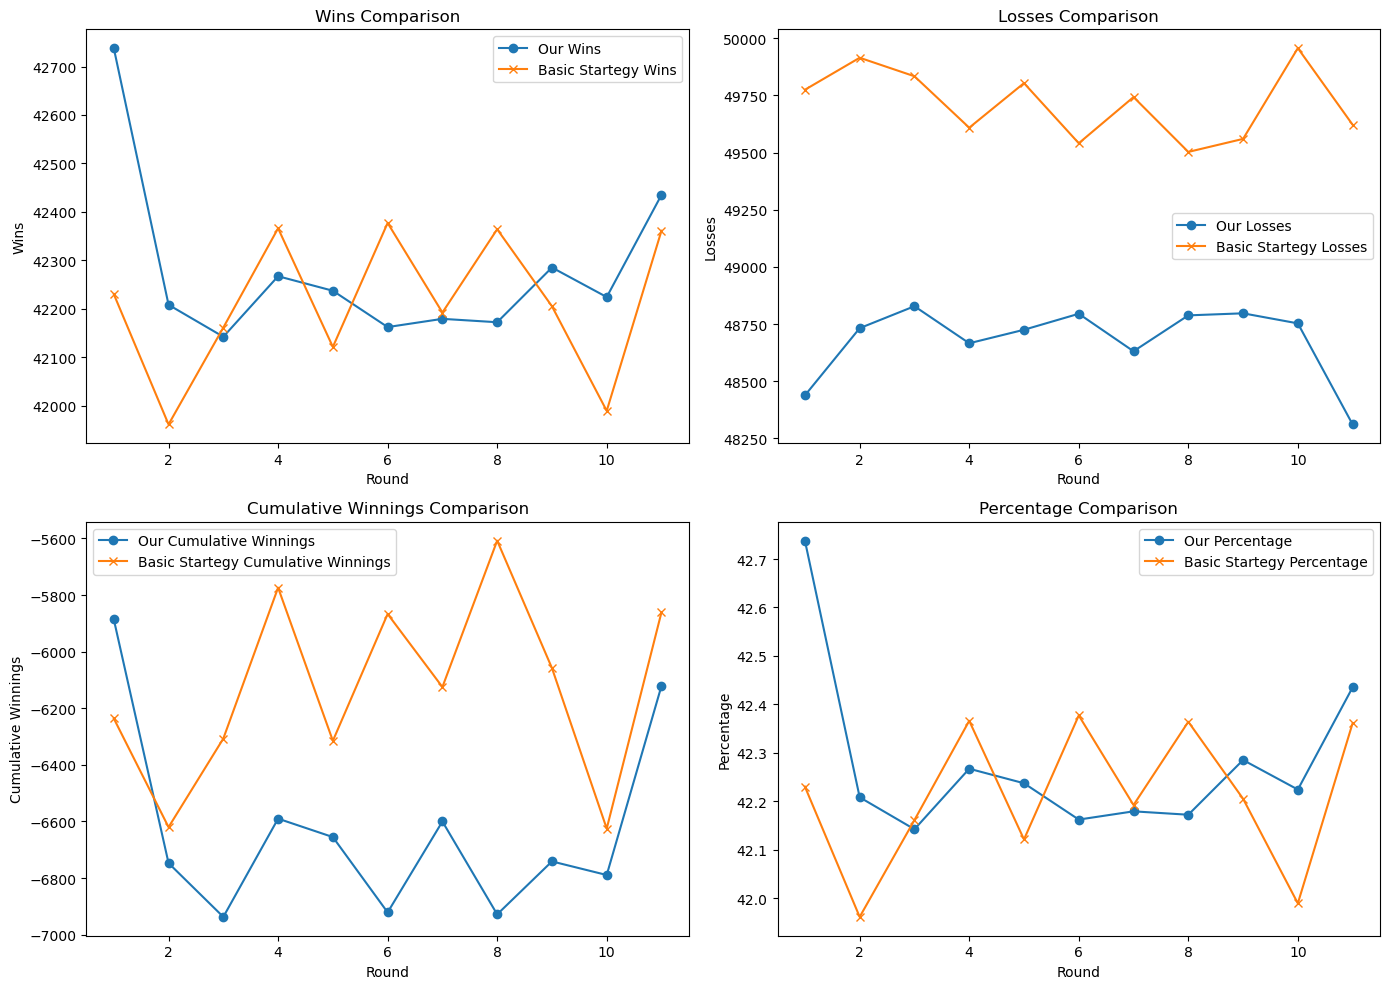

In [8]:
import matplotlib.pyplot as plt

indices = list(range(1, len(our_win) + 1))
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(indices, our_win, label='Our Wins', marker='o')
axs[0, 0].plot(indices[:len(basic_win)], basic_win, label='Basic Startegy Wins', marker='x')
axs[0, 0].set_title('Wins Comparison')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Wins')
axs[0, 0].legend()

axs[0, 1].plot(indices, our_loss, label='Our Losses', marker='o')
axs[0, 1].plot(indices[:len(basic_loss)], basic_loss, label='Basic Startegy Losses', marker='x')
axs[0, 1].set_title('Losses Comparison')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Losses')
axs[0, 1].legend()

axs[1, 0].plot(indices[:len(our_cumaltive)], our_cumaltive, label='Our Cumulative Winnings', marker='o')
axs[1, 0].plot(indices[:len(basic_cumaltive)], basic_cumaltive, label='Basic Startegy Cumulative Winnings', marker='x')
axs[1, 0].set_title('Cumulative Winnings Comparison')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Cumulative Winnings')
axs[1, 0].legend()

axs[1, 1].plot(indices, our_percentage, label='Our Percentage', marker='o')
axs[1, 1].plot(indices[:len(basic_percentage)], basic_percentage, label='Basic Startegy Percentage', marker='x')
axs[1, 1].set_title('Percentage Comparison')
axs[1, 1].set_xlabel('Round')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [10]:
ace_matrix = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 2, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 10)

non_ace_matrix = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 2, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).reshape(18, 10)

In [11]:
basic_ace_matrix = np.array([
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).reshape(10, 10)

basic_non_ace_matrix = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 1, 2],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).reshape(18, 10)

In [12]:
score = 0
total_possible = ace_matrix.size

for i in range(10):
    for j in range(10):
        if ace_matrix[i, j] == basic_ace_matrix[i, j]:
            score += 1
        if basic_ace_matrix[i,j]==2 and ace_matrix[i,j]==1:
            score += 0.5
        if basic_ace_matrix[i,j]==1 and ace_matrix[i,j]==2:
            score += 0.5

similarity_score = score / total_possible
similarity_score
print(score, total_possible)

48.5 100


In [13]:
score = 0
total_possible = non_ace_matrix.size

for i in range(18):
    for j in range(10):
        if non_ace_matrix[i, j] == basic_non_ace_matrix[i, j]:
            score += 1
        if basic_non_ace_matrix[i,j]==2 and non_ace_matrix[i,j]==1:
            score += 0.5
        if basic_non_ace_matrix[i,j]==1 and non_ace_matrix[i,j]==2:
            score += 0.5

similarity_score = score / total_possible
print(score, total_possible)

154.0 180
